In [2]:
import pandas as pd
import numpy as np
import os
import random
import cv2


from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/DSCI_ML_Final_Project/')


workdir=os.listdir('/content/drive/MyDrive/DSCI_ML_Final_Project/')
if '.DS_Store' in workdir:
  workdir.remove('.DS_Store')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



**i. Images in each class are given in separate folders. The file Classes.xlsx pro- vides the classes assigned to the bird species images in each folder. Therefore, you encode your classes using one-hot encoding and Classes.xlsx.**

In [3]:
df = pd.read_excel('Data/Classes.xlsx')
df.columns=['folder_name','class']
lis_birds=df['folder_name'].tolist()
print(lis_birds)

['005.Crested_Auklet', '013.Bobolink', '015.Lazuli_Bunting', '023.Brandt_Cormorant', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '067.Anna_Hummingbird', '072.Pomarine_Jaeger', '076.Dark_eyed_Junco', '081.Pied_Kingfisher', '082.Ringed_Kingfisher', '086.Pacific_Loon', '099.Ovenbird', '104.American_Pipit', '127.Savannah_Sparrow', '135.Bank_Swallow', '141.Artic_Tern', '149.Brown_Thrasher', '156.White_eyed_Vireo', '168.Kentucky_Warbler']


In [4]:
classes = df['class'].unique()


In [5]:
class_dict = {}
for c in classes:
    one_hot = np.array(np.eye(len(classes))[c])
    class_dict[c] = one_hot

In [6]:
for _, row in df.iterrows():
    image_id = row['folder_name']
    image_class = row['class']
    one_hot = class_dict[image_class]

In [7]:
one_hot_df = pd.get_dummies(df['class'])

one_hot_df = pd.DataFrame(lis_birds, columns=['bird']).join(one_hot_df)




one_hot_df

cols = one_hot_df.columns.to_list()[1:]

# Rename the selected columns
one_hot_df = one_hot_df.rename(columns=dict(zip(cols, lis_birds)))
one_hot_df

,bird,005.Crested_Auklet,013.Bobolink,015.Lazuli_Bunting,023.Brandt_Cormorant,040.Olive_sided_Flycatcher,041.Scissor_tailed_Flycatcher,067.Anna_Hummingbird,072.Pomarine_Jaeger,076.Dark_eyed_Junco,...,082.Ringed_Kingfisher,086.Pacific_Loon,099.Ovenbird,104.American_Pipit,127.Savannah_Sparrow,135.Bank_Swallow,141.Artic_Tern,149.Brown_Thrasher,156.White_eyed_Vireo,168.Kentucky_Warbler
0,005.Crested_Auklet,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,013.Bobolink,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,015.Lazuli_Bunting,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,023.Brandt_Cormorant,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,040.Olive_sided_Flycatcher,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,041.Scissor_tailed_Flycatcher,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,067.Anna_Hummingbird,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,072.Pomarine_Jaeger,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,076.Dark_eyed_Junco,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,081.Pied_Kingfisher,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# List the files in the 'my_folder' directory
file_names = os.listdir('Data/images/')

# Filter out directories from the list of file names
#file_names = [file for file in file_names if os.path.isfile(os.path.join('my_folder', file))]

# Print the names of the files in the directory


file_names=[i for i in file_names if i!='.DS_Store' ]
print(sorted(file_names))


file_names_1=[]



for i in range(0,len(file_names)):
    file_names_1.append('Data/images/'+ str(file_names[i]))
#file_names_1=file_names_1[:-1]
file_names_1=sorted(file_names_1)

print(len(file_names_1))


['005.Crested_Auklet', '013.Bobolink', '015.Lazuli_Bunting', '023.Brandt_Cormorant', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '067.Anna_Hummingbird', '072.Pomarine_Jaeger', '076.Dark_eyed_Junco', '081.Pied_Kingfisher', '082.Ringed_Kingfisher', '086.Pacific_Loon', '099.Ovenbird', '104.American_Pipit', '127.Savannah_Sparrow', '135.Bank_Swallow', '141.Artic_Tern', '149.Brown_Thrasher', '156.White_eyed_Vireo', '168.Kentucky_Warbler']
20


**ii. Randomly select ⌈0.7ni⌉ images from each folder as your training set, ⌈0.15ni⌉ as validation set, and the rest as your test set, where ni is the number of images in folder i and ⌈x⌉ is the ceiling of x.**

In [9]:
#os.remove('Data/images/.DS_Store')

def get_three_list(my_list):
    # Import the random module

    # Define the list of elements
    #my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]

    # Select 70% of the elements using the sample() method
    selected_70 = random.sample(my_list, int(len(my_list) * 0.7))

    my_list = [x for x in my_list if x not in selected_70]

    # Select 15% of the elements using the sample() method
    selected_15 = random.sample(my_list, int(len(my_list) * 0.5))

    # Remove the selected elements from the original list
    my_list = [x for x in my_list if x not in selected_15]
    #print(my_list)

    # Select 5% of the elements using the sample() method
    selected_5 = my_list

    # Print the selected elements
    #     print(selected_70)
    #     print(selected_15)
    #     print(selected_5)
    
    return selected_70,selected_15,selected_5



training_set=[]
validation_set=[]
test_set=[]

for folder in file_names_1:
    temp_train=[]
    temp_val=[]
    temp_test=[]
    
    
    file_names = os.listdir(folder)
    
    for i in range(0,len(file_names)):
        file_names[i]=folder+'/'+file_names[i]
    
    temp_train,temp_val,temp_test=get_three_list(file_names)
    
    
    training_set.extend(temp_train)
    validation_set.extend(temp_val)
    test_set.extend(temp_test)

print(len(validation_set))
print(len(training_set))
print(len(test_set))


178
820
178


**iii. In order for all the images to have the same size, zero-pad or resize the images in your dataset. This can be done using various tools, including OpenCV.**

In [10]:
# Import the cv2 module


# Uncomment only if you need to create the folders!

import sys
from shutil import rmtree


# Define the desired size of the image
desired_size = (256, 256)

train_directory = 'Train'
test_directory = 'Test'
val_directory = 'Validation'

# rmtree(test_directory)
# rmtree(train_directory)
# rmtree(val_directory)


# sys.exit(0)



if not os.path.exists(train_directory):
  for i in range(0,len(training_set)):
      if(i%50==0):
          print(i)
          
      #print(training_set[i])
      
      image_name=training_set[i].split('/')[-1]
      label_name=training_set[i].split('/')[-2]
      
      #print("label_name=",label_name)
      
      
      image = cv2.imread(training_set[i])

      # Use the resize() method to resize the image
      image = cv2.resize(image, desired_size)
      
      

      folder = 'Train'

      # Use the os module to construct the file path
      file_path = os.path.join(folder, label_name)
      file_path1 = os.path.join(file_path, image_name)
      #print("file path =",file_path)
      #print("file path1 =",file_path1)
      
      isExist = os.path.exists(file_path)
      if not isExist:
          print("creating a directory for ",file_path)

          # Create a new directory because it does not exist
          os.makedirs(file_path)
      cv2.imwrite(file_path1, image)
else:
  print("Directory with train Images Exist")


if not os.path.exists(test_directory):
  for i in range(0,len(validation_set)):
      
      image_name=validation_set[i].split('/')[-1]
      label_name=validation_set[i].split('/')[-2]

      
      
      image = cv2.imread(validation_set[i])

      # Use the resize() method to resize the image
      image = cv2.resize(image, desired_size)
      
      

      folder = 'Validation'

      
      # Use the os module to construct the file path
      file_path = os.path.join(folder, label_name)
      file_path1 = os.path.join(file_path, image_name)
      #print("file path =",file_path)
      #print("file path1 =",file_path1)
      
      isExist = os.path.exists(file_path)
      if not isExist:
          print("creating a directory for ",file_path)

          # Create a new directory because it does not exist
          os.makedirs(file_path)
      cv2.imwrite(file_path1, image)
else:
  print("Directory with Validation Images Exist")


if not os.path.exists(test_directory):
  for i in range(0,len(test_set)):
      
      image_name=test_set[i].split('/')[-1]
      label_name=test_set[i].split('/')[-2]
      
      
      image = cv2.imread(test_set[i])

      # Use the resize() method to resize the image
      image = cv2.resize(image, desired_size)
      
      

      folder = 'Test'

      # Use the os module to construct the file path
      file_path = os.path.join(folder, label_name)
      file_path1 = os.path.join(file_path, image_name)
      #print("file path =",file_path)
      #print("file path1 =",file_path1)
      
      isExist = os.path.exists(file_path)
      if not isExist:
          print("creating a directory for ",file_path)

          # Create a new directory because it does not exist
          os.makedirs(file_path)
      cv2.imwrite(file_path1, image)
else:
  print("Directory with Test Images Exist")


    


Directory with train Images Exist
Directory with Validation Images Exist
Directory with Test Images Exist


In [11]:
# import os

# dir_name = "Validation"
# test = os.listdir(dir_name)

# for item in test:
#     if item.endswith(".jpg"):
#         os.remove(os.path.join(dir_name, item))

In [12]:

train_dir = os.path.join( 'Train')
validation_dir = os.path.join('Validation')
test_dir=os.path.join('Test')

train_auklet_dir = os.path.join(train_dir, '005.Crested_Auklet')

train_lazuli_dir = os.path.join(train_dir, '015.Lazuli_Bunting')

validation_uklet_dir = os.path.join(validation_dir, '005.Crested_Auklet')

validation_lazuli_dir = os.path.join(validation_dir, '015.Lazuli_Bunting')




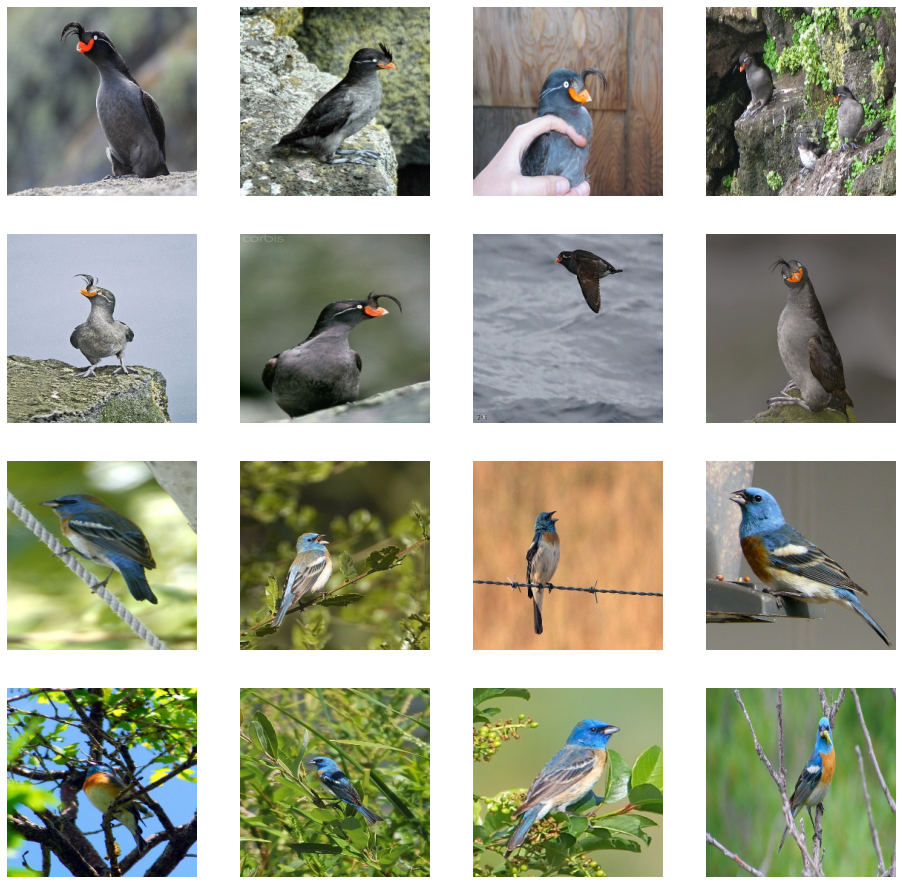

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 9
train_auklet_fnames = os.listdir( train_auklet_dir )
train_lazuli_fnames = os.listdir( train_lazuli_dir )


next_auklet_pix = [os.path.join(train_auklet_dir, fname) 
                for fname in train_auklet_fnames[ pic_index-8:pic_index] 
               ]

next_lazuli_pix = [os.path.join(train_lazuli_dir, fname) 
                for fname in train_lazuli_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_auklet_pix+next_lazuli_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### ii. To perform empirical regularization, crop, randomly zoo, rotate, flip, contrast, and translate images in your training set for image augmentation. You can use various tools to do this, including OpenCV.

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input


data_generator = ImageDataGenerator()

# Set the number of times the dataset should be repeated
#data_generator = data_generator.repeat(10000)



# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,preprocessing_function=preprocess_input)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( )


testdata_gen=ImageDataGenerator( )



# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224),shuffle = True)
# train_datagen=train_datagen.repeat(700)
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'categorical',  target_size = (224, 224))


test_generator=testdata_gen.flow_from_directory( test_dir,  batch_size = 20, class_mode = 'categorical',  target_size = (224, 224))





Found 820 images belonging to 20 classes.
Found 178 images belonging to 20 classes.
Found 178 images belonging to 20 classes.


iii) Use ReLU activation functions in the last layer and a softmax layer, along with batch normalization 4 and a dropout rate of 20% as well as ADAM optimizer. Use multinomial cross entropy loss. You can try any batch size, but a batch size of 5 seems reasonable.

In [27]:
#This is for VGG16
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet') 


for layer in base_model.layers:
    layer.trainable = False



##This is  giving good results!
from keras import layers
import tensorflow as tf
from keras import losses,optimizers



# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a max pooling layer
#x = layers.MaxPooling2D()(x)

# Add batch normalization and dropout layers
x = layers.BatchNormalization()(x)

x = layers.Dropout(0.2)(x)

#RelU
x = layers.Dense(512, activation='relu')(x)


# Add a final softmax layer with 20 node for classification output
x = layers.Dense(20, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy",metrics = ['acc'])

# steps = 12
# vgg16 = model_final.fit(train_generator, validation_data = validation_generator, steps_per_epoch = steps, epochs = 10)


In [28]:
#This is for effiecientnet!


from tensorflow.keras.applications import EfficientNetB0
from keras import layers
import tensorflow as tf
from keras import losses,optimizers


base_model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)


x = layers.Dense(1024, activation="relu")(x)


# Add a final sigmoid layer with 1 node for classification output
predictions = layers.Dense(20, activation='softmax')(x)


model_final = tf.keras.models.Model(inputs = base_model.input, outputs = predictions)
model_final.compile(optimizers.Adam(),loss="categorical_crossentropy",metrics = ['acc'])

# steps = 12
# effnet = model_final.fit(train_generator, validation_data = validation_generator, steps_per_epoch = steps, epochs = 10)


(iv) Train the networks (EfficientNetB0 and VGG16) for at least 50 epochs (preferably 100 epochs) and perform early stopping using the validation set. Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs.

In [29]:
# Import the necessary modules
from keras import callbacks

# Define the early stopping callback
early_stopping_vgg16 = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    mode="min"
)

early_stopping_effnet = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=12,
    mode="min"
)




steps = 35
#For  VGG16
print("====================VGG16=================")

vgg16 = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = steps, epochs = 100,callbacks=early_stopping_vgg16)



#For EfficientNetB0
print("====================Efficient Net=================")
effnet = model_final.fit(train_generator, validation_data = validation_generator, steps_per_epoch = steps, epochs = 100,callbacks=early_stopping_effnet)




====================VGG16=================
Epoch 1/100
35/35 [==============================] - 12s 330ms/step - loss: 5.2720 - acc: 0.2871 - val_loss: 20.0170 - val_acc: 0.3596
Epoch 2/100
35/35 [==============================] - 11s 322ms/step - loss: 3.5522 - acc: 0.5343 - val_loss: 16.0746 - val_acc: 0.4157
Epoch 3/100
35/35 [==============================] - 12s 346ms/step - loss: 2.8654 - acc: 0.6314 - val_loss: 14.5886 - val_acc: 0.4494
Epoch 4/100
35/35 [==============================] - 12s 334ms/step - loss: 2.0153 - acc: 0.7043 - val_loss: 13.2324 - val_acc: 0.4719
Epoch 5/100
35/35 [==============================] - 11s 321ms/step - loss: 2.0037 - acc: 0.7143 - val_loss: 11.7244 - val_acc: 0.5337
Epoch 6/100
35/35 [==============================] - 11s 318ms/step - loss: 1.7872 - acc: 0.7543 - val_loss: 11.7666 - val_acc: 0.4719
Epoch 7/100
35/35 [==============================] - 11s 320ms/step - loss: 1.4318 - acc: 0.7643 - val_loss: 12.9112 - val_acc: 0.4775
Epoch 8/100


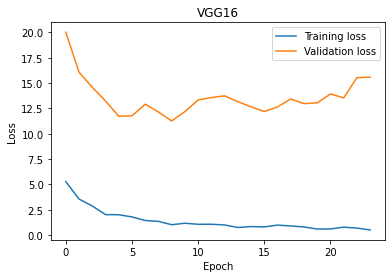

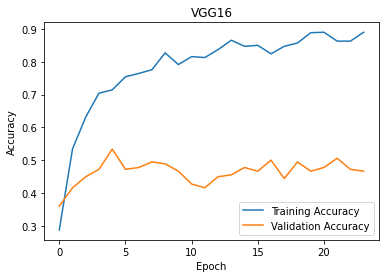

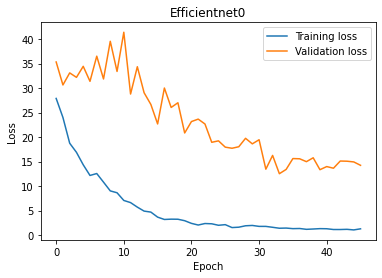

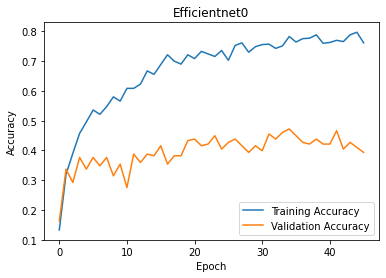

In [30]:
# Import the necessary modules
import matplotlib.pyplot as plt

# Extract the training and validation losses
train_loss = vgg16.history["loss"]
val_loss = vgg16.history["val_loss"]


plt.figure(1)
# Plot the training and validation losses
plt.plot(train_loss, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("VGG16")
plt.show()




# Extract the training and validation losses
train_acc = vgg16.history["acc"]
val_acc = vgg16.history["val_acc"]


plt.figure(2)
# Plot the training and validation losses
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("VGG16")
plt.show()




#Now Let's do the same for the  EffiecientNet0

# Extract the training and validation losses
train_loss = effnet.history["loss"]
val_loss = effnet.history["val_loss"]


plt.figure(3)
# Plot the training and validation losses
plt.plot(train_loss, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Efficientnet0")
plt.show()




# Extract the training and validation losses
train_acc = effnet.history["acc"]
val_acc = effnet.history["val_acc"]


plt.figure(4)
# Plot the training and validation losses
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Efficientnet0")
plt.show()

In [31]:
results = model.evaluate(test_generator, batch_size=128)
print("test loss, test acc:", results)

9/9 [==============================] - 26s 3s/step - loss: 11.6566 - acc: 0.5393
test loss, test acc: [11.656641960144043, 0.5393258333206177]


In [32]:
results = model_final.evaluate(test_generator, batch_size=128)
print("test loss, test acc:", results)

9/9 [==============================] - 1s 117ms/step - loss: 14.2852 - acc: 0.4326
test loss, test acc: [14.285200119018555, 0.4325842559337616]


In [33]:
one_hot_df

hash={}

for index,row in one_hot_df.iterrows():

  hash[row[0]]=np.argmax(list(row[1:]))

print(hash)




{'005.Crested_Auklet': 0, '013.Bobolink': 1, '015.Lazuli_Bunting': 2, '023.Brandt_Cormorant': 3, '040.Olive_sided_Flycatcher': 4, '041.Scissor_tailed_Flycatcher': 5, '067.Anna_Hummingbird': 6, '072.Pomarine_Jaeger': 7, '076.Dark_eyed_Junco': 8, '081.Pied_Kingfisher': 9, '082.Ringed_Kingfisher': 10, '086.Pacific_Loon': 11, '099.Ovenbird': 12, '104.American_Pipit': 13, '127.Savannah_Sparrow': 14, '135.Bank_Swallow': 15, '141.Artic_Tern': 16, '149.Brown_Thrasher': 17, '156.White_eyed_Vireo': 18, '168.Kentucky_Warbler': 19}


In [34]:

# Import the necessary libraries
from PIL import Image
from numpy import asarray


desired_size=(224,224)


folders=os.listdir('Test')
#print(folders)

x_test=[]
y_test=[]


for i in range(0,len(folders)):
  files_in_folder=os.listdir('Test/'+folders[i])
  #print(files_in_folder)

  for file in files_in_folder:
    #print('test/'+folders[i]+'/'+file)

    image = cv2.imread('Test/'+folders[i]+'/'+file)

    image = cv2.resize(image, desired_size)
    
    img_array=asarray(image)

    x_test.append(img_array)
    y_test.append(hash[folders[i]])


x_test=np.array(x_test)

print(x_test.shape)


  
y_pred_vgg16=model.predict(x_test)
y_pred_effnet=model_final.predict(x_test)

y_pred_vgg16_1=[]
y_pred_effnet_1=[]
for i in range(0,len(y_pred_vgg16)):
  y_pred_vgg16_1.append(np.argmax(y_pred_vgg16[i]))
  y_pred_effnet_1.append(np.argmax(y_pred_effnet[i]))

#print(y_pred_1)
#print(y_test)



(178, 224, 224, 3)
6/6 [==============================] - 2s 48ms/step


(v) Report Precision, Recall, and F1 score for your model. Remember that this is a multi-class classification problem.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,classification_report

print("================= Report for VGG16 ====================================")
report=classification_report(y_pred_vgg16_1,y_test)
print(report)

print("================= Report for EfficentNetb0 ====================================")
report=classification_report(y_pred_effnet_1,y_test)
print(report)

================= Report for VGG16 ====================================
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.46      0.55        13
           2       0.33      1.00      0.50         3
           3       0.33      1.00      0.50         3
           4       0.44      0.57      0.50         7
           5       0.78      0.58      0.67        12
           6       1.00      0.75      0.86        12
           7       0.89      0.80      0.84        10
           8       0.78      0.50      0.61        14
           9       0.56      1.00      0.71         5
          10       0.56      0.83      0.67         6
          11       1.00      0.60      0.75        15
          12       0.44      0.67      0.53         6
          13       0.67      0.50      0.57        12
          14       0.56      0.56      0.56         9
          15       0.56      0.50      0.53        10
         

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
